# Import

In [1]:
from topologicpy.Topology import Topology
from topologicpy.CellComplex import CellComplex
import time

# Build CellComplex


In [2]:
# FaceClusters by BREPs
clusterA = Topology.ByBREPPath('BReps/BlockA.brep')
clusterB = Topology.ByBREPPath('BReps/BlockB.brep')
# CellComplexes by FaceClusters
cellComplexA=CellComplex.ByFacesCluster(clusterA)
cellComplexB=CellComplex.ByFacesCluster(clusterB)
# Cells by CellComplexes
cells=CellComplex.Cells(cellComplexA)+CellComplex.Cells(cellComplexB)

# Compute time

In [3]:
# Time required for creating a CellComplex by Cells
data=[]
for i in range(1, len(cells)):
    if i % 5 == 0:
        cellsToCellComplex = cells[0:i]
        # Time
        start_time = time.time()
        testCellComplex = CellComplex.ByCells(cellsToCellComplex)
        end_time = time.time()
        elapsed_time = end_time - start_time
        # Result
        result = {
            'nOfCells':len(cellsToCellComplex),
            'nOfFaces':len(CellComplex.Faces(testCellComplex)),
            'time':elapsed_time
        }
        print(result)
        data.append(result)

{'nOfCells': 5, 'nOfFaces': 50, 'nOfEdges': 116, 'nOfVertices': 72, 'time': 0.5017881393432617}
{'nOfCells': 10, 'nOfFaces': 74, 'nOfEdges': 153, 'nOfVertices': 90, 'time': 1.2077183723449707}
{'nOfCells': 15, 'nOfFaces': 98, 'nOfEdges': 190, 'nOfVertices': 108, 'time': 1.6881155967712402}
{'nOfCells': 20, 'nOfFaces': 124, 'nOfEdges': 233, 'nOfVertices': 130, 'time': 2.592505693435669}
{'nOfCells': 25, 'nOfFaces': 146, 'nOfEdges': 264, 'nOfVertices': 144, 'time': 3.1495118141174316}
{'nOfCells': 30, 'nOfFaces': 165, 'nOfEdges': 286, 'nOfVertices': 152, 'time': 3.9297080039978027}
{'nOfCells': 35, 'nOfFaces': 201, 'nOfEdges': 348, 'nOfVertices': 183, 'time': 6.0848188400268555}
{'nOfCells': 40, 'nOfFaces': 218, 'nOfEdges': 366, 'nOfVertices': 189, 'time': 7.534276008605957}
{'nOfCells': 45, 'nOfFaces': 245, 'nOfEdges': 406, 'nOfVertices': 207, 'time': 9.658281087875366}
{'nOfCells': 50, 'nOfFaces': 264, 'nOfEdges': 428, 'nOfVertices': 215, 'time': 10.995238304138184}
{'nOfCells': 55, 'n

# Plot results

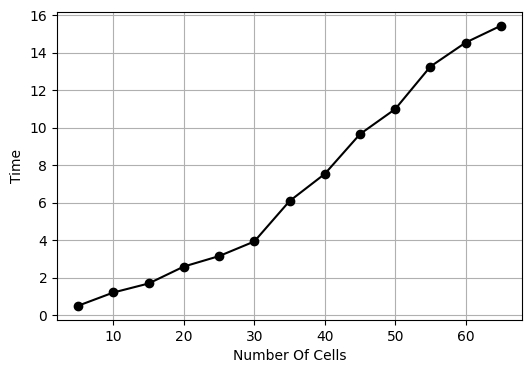

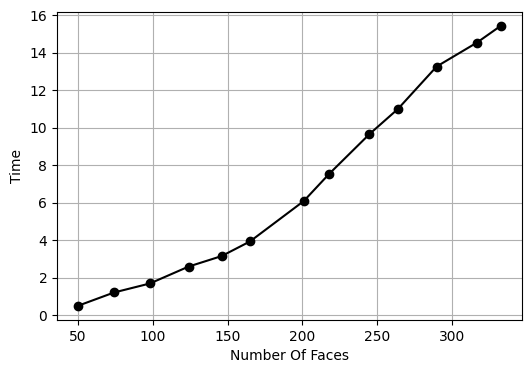

In [5]:
# Plot graphs
import matplotlib.pyplot as plt

# Extracting values for the x and y axes
nOfCells_values = [entry['nOfCells'] for entry in data]
nOfFaces_values = [entry['nOfFaces'] for entry in data]
nOfVertices_values = [entry['nOfVertices'] for entry in data]
time_values = [entry['time'] for entry in data]

# nOfCells/time
plt.figure(figsize=(6, 4))  # Set the figure size
plt.plot(nOfCells_values, time_values, marker='o', linestyle='-', color='black')
plt.xlabel('Number Of Cells')
plt.ylabel('Time')
plt.grid(True)
#plt.savefig('nOfCells-time.png')
plt.show()


# nOfFaces/time
plt.figure(figsize=(6, 4))  # Set the figure size
plt.plot(nOfFaces_values, time_values, marker='o', linestyle='-', color='black')
plt.xlabel('Number Of Faces')
plt.ylabel('Time')
plt.grid(True)
#plt.savefig('nOfFaces-time.png')
plt.show()
